In [1]:
from sympy import var
from sympy.physics.hydrogen import E_nl

In [2]:
var("n Z")

(n, Z)

In [3]:
E_nl(n, Z)

-Z**2/(2*n**2)

In [4]:
from sympy.physics.hydrogen import E_nl_dirac

In [5]:
from sympy.physics.hydrogen import R_nl

In [6]:
var("r Z")

(r, Z)

In [7]:
H =R_nl(2, 0, r)

In [8]:
from sympy import integrate, oo

In [9]:
integrate(R_nl(1, 0, r)**2 * r**2, (r, 0, oo))

1

In [10]:
from sympy.plotting import plot

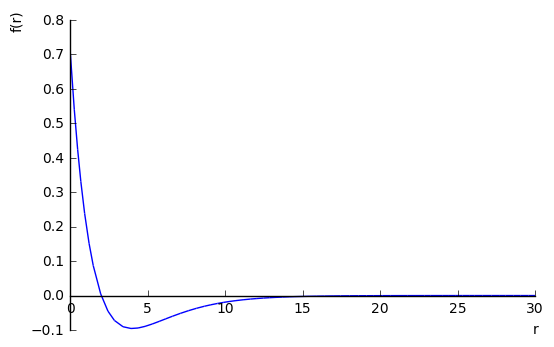

In [13]:
plot(H, (r, 0, 30))

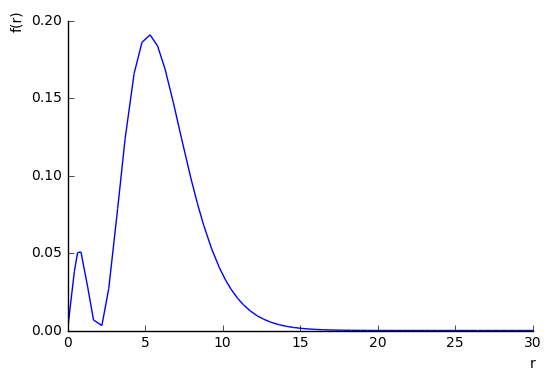

In [14]:
plot(H**2 * r**2, (r, 0, 30))

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.special as ss
import numpy as np
import math, pdb, sympy

In [16]:
def Laguerre(p,q):
    x = sympy.Symbol('x')
    exp = (-1)**p*sympy.diff(sympy.simplify(sympy.E**x*sympy.diff(sympy.E**(-x)*x**q,x,q)),x,p)
    return lambda x: eval(str(exp))

In [17]:
def SphericalHarmonic(l,m,theta,phi,epsilon):
    # this function uses the associated legendre polynomial evaluator from scipy.special
    return epsilon*np.sqrt((2.*l+1)*math.factorial(l-np.abs(m))/(4*np.pi*math.factorial(l+np.abs(m))))*np.real(np.exp(1.j*m*phi)*ss.lpmv(m,l,np.cos(theta)))

In [18]:
def Radial(n,l,r,a):
    p = r/(n*a)
    lag = Laguerre(2*l+1,n+l)
    # this function uses the associated laguerre polynomial evaluator from scipy.special
    return np.sqrt((2./n/a)**3*math.factorial(n-l-1)/(2.*n*(math.factorial(n+1))**3))*np.exp(-p)*(2*p)**l*lag(2*p)

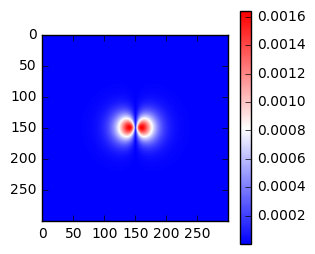

In [77]:
plt.figure(figsize=(3,3))
resolution = 300; frame_apothem = 300

n=2
l=1
m=1
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.abs(Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
#plt.contour(Z, cmap=cm.bwr)
plt.imshow(Z, cmap=cm.bwr)
plt.colorbar()
plt.show()

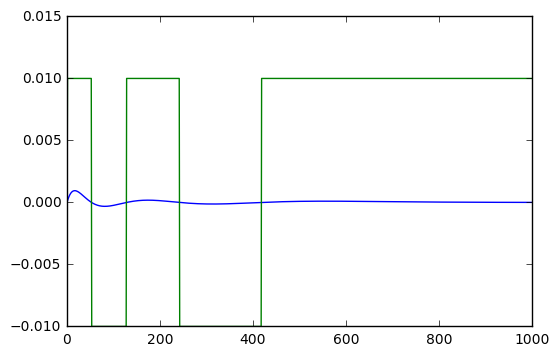

In [63]:
x = np.linspace(0,1000,1000)
n=6
l=1
m=0
a=10
P = Radial(n,l,x,a)
S = np.sign(Radial(n,l,x,a))
plt.plot(x,P)
plt.plot(x,S/100.0)
#plt.ylim(-2,2)
plt.show()

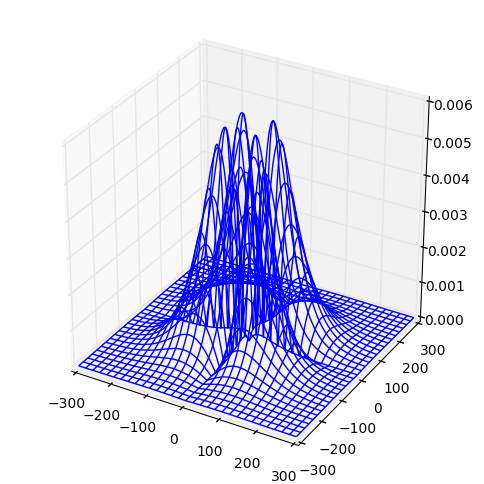

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
resolution = 300; frame_apothem = 300

n=3
l=2
m=1
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.abs(Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
ax=fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

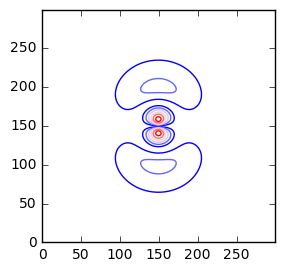

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(3,3))
resolution = 300; frame_apothem = 300

n=3
l=1
m=0
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.abs(Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
plt.contour(Z, cmap=cm.bwr)
plt.show()

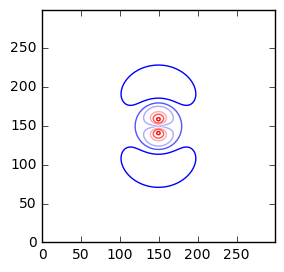

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(3,3))
resolution = 300; frame_apothem = 300

n=3
l=1
m=0
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*np.sign(SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))*np.abs(Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
plt.contour(Z, cmap=cm.bwr)
plt.show()

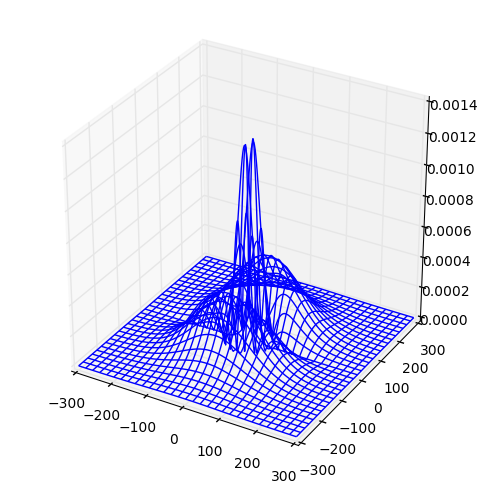

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
resolution = 300; frame_apothem = 300

n=3
l=1
m=0
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Radial(n,l,np.sqrt((X**2+Y**2)),a)*SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps)
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
ax=fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

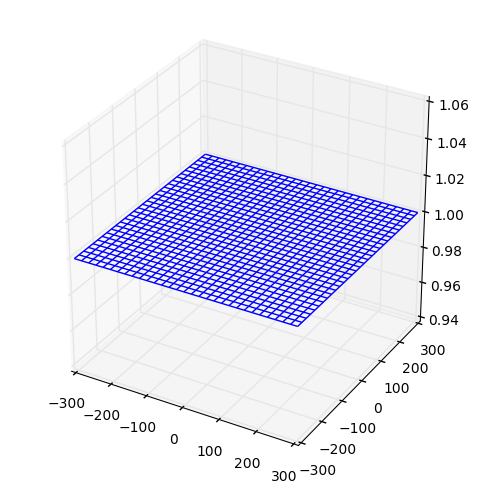

In [129]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
resolution = 300; frame_apothem = 300

n=3
l=1
m=-1
a=10

if m>=0:
  eps = (-1)**m
else:
  eps = 1

# create array of data points
x = np.linspace(-frame_apothem,frame_apothem,resolution)
y = np.linspace(-frame_apothem,frame_apothem,resolution)
X, Y = np.meshgrid(x,y)
# create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
Z = np.sign(SphericalHarmonic(l,m,np.arctan(X/(Y+1e-10)),0,eps))
#Z = np.sign(Radial(n,l,np.sqrt((X**2+Y**2)),a))*Z
#plt.pcolor(X, Y, Z, vmin=-0.000001, vmax=0.000001)
#Z = Z.astype(np.float)
# this is done to "raise" the lower, less perceptible values to sight
#Z = np.sqrt(Z)
# plot the wavefunction in grayscale
ax=fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()